## Análisis de datos - Clase 2

### Ejercicio resuelto

EDA de la columna 'fare' (precio del pasaje) del dataset Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Cargamos el dataset de Titanic viene incluido en la biblioteca Seaborn
titanic_df = sns.load_dataset('titanic') # sns.load_dataset Devuelve un Pandas DF
titanic_df = titanic_df.drop(columns=['deck'])
df = titanic_df.dropna() # Eliminamos los datos nulos con dropna()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


#### Distribución de la variable

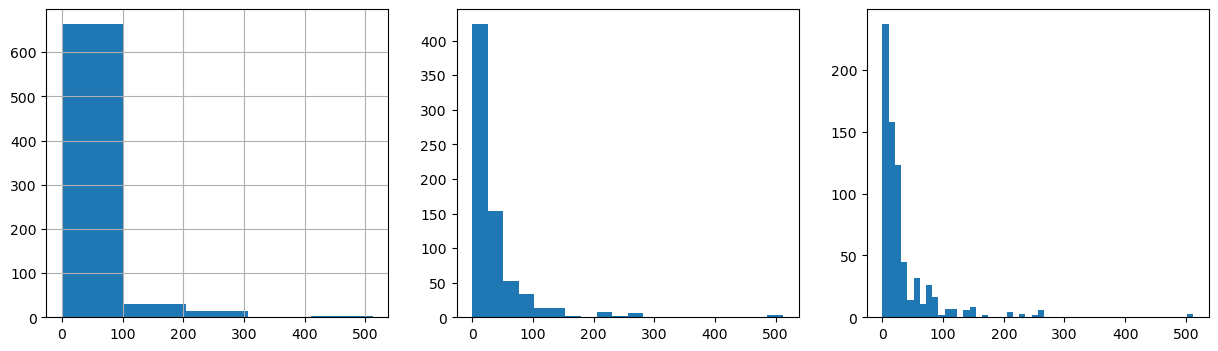

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(df['fare'], bins=5)
ax[1].hist(df['fare'], bins=20)
ax[2].hist(df['fare'], bins=50)

ax[0].grid(True)
plt.show()


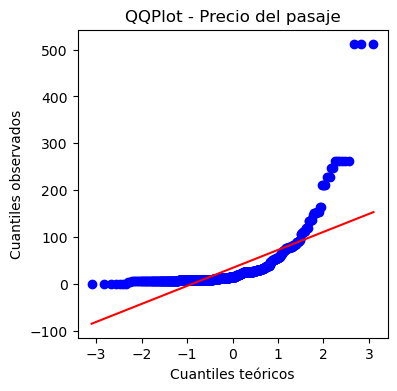

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

st.probplot(df['fare'], dist="norm", plot=ax)
ax.set_title("QQPlot - Precio del pasaje")
ax.set_xlabel("Cuantiles teóricos")
ax.set_ylabel("Cuantiles observados")
plt.show()

### Estadísticas varias

In [5]:
media = df['fare'].mean()
var = df['fare'].var()
std_dev = df['fare'].std()
mediana = df['fare'].median()
skewness = st.skew(df['fare'])
curtosis = st.kurtosis(df['fare'])

print(f"Media: {media:.02f}")
print(f"Varianza: {media:.02f}")
print(f"Desvío estándar: {media:.02f}")

print(f"Mediana: {mediana:.02f}")
print(f"Skewness: {skewness:.02f}")
print(f"Curtosis: {curtosis:.02f}")

Media: 34.57
Varianza: 34.57
Desvío estándar: 34.57
Mediana: 15.65
Skewness: 4.66
Curtosis: 30.79


In [6]:
Q1 = df['fare'].quantile(0.25)
Q2 = df['fare'].quantile(0.50)  # Percentile 50 - Equivalente a la mediana
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 (25%):", Q1)
print("Q2 (50%):", Q2)
print("Q3 (75%):", Q3)

print("Rango intercuartil (IQR):", IQR)

Q1 (25%): 8.05
Q2 (50%): 15.64585
Q3 (75%): 33.0
Rango intercuartil (IQR): 24.95


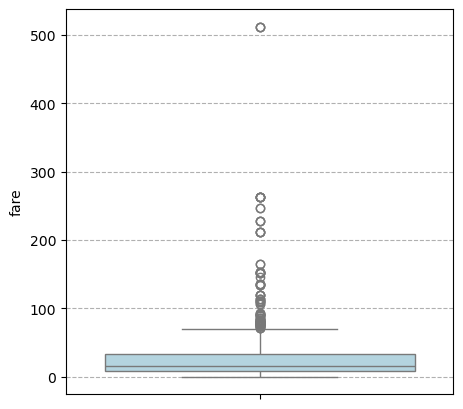

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df, y='fare', color="lightblue", ax=ax)
ax.grid(axis='y', ls='--')
plt.show()

### Limitamos a los pasajeros con valor de pasaje <=150

In [ ]:
df_lim = df[df['fare']<=150]
df_lim.head()

In [8]:
filtro = df['fare']<=150
df_lim = df[filtro]
df_lim.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


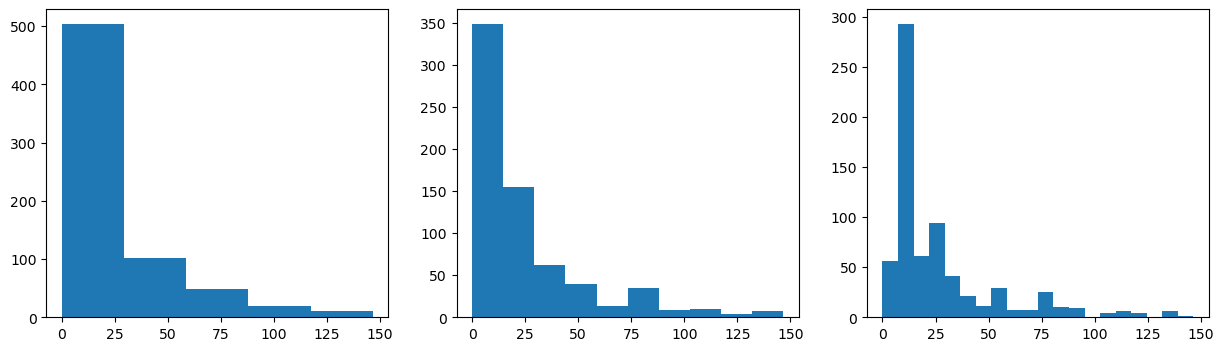

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(df_lim['fare'], bins=5)
ax[1].hist(df_lim['fare'], bins=10)
ax[2].hist(df_lim['fare'], bins=20)
plt.show()

In [10]:
media = df_lim['fare'].mean()
mediana = df_lim['fare'].median()
skewness = st.skew(df_lim['fare'])
curtosis = st.kurtosis(df_lim['fare'])

print(f"Media: {media:.02f}")
print(f"Mediana: {mediana:.02f}")
print(f"Skewness: {skewness:.02f}")
print(f"Curtosis: {curtosis:.02f}")

Media: 26.39
Mediana: 14.45
Skewness: 1.98
Curtosis: 3.75


#### Visualizamos la variable con Boxplots

In [11]:
titanic_df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

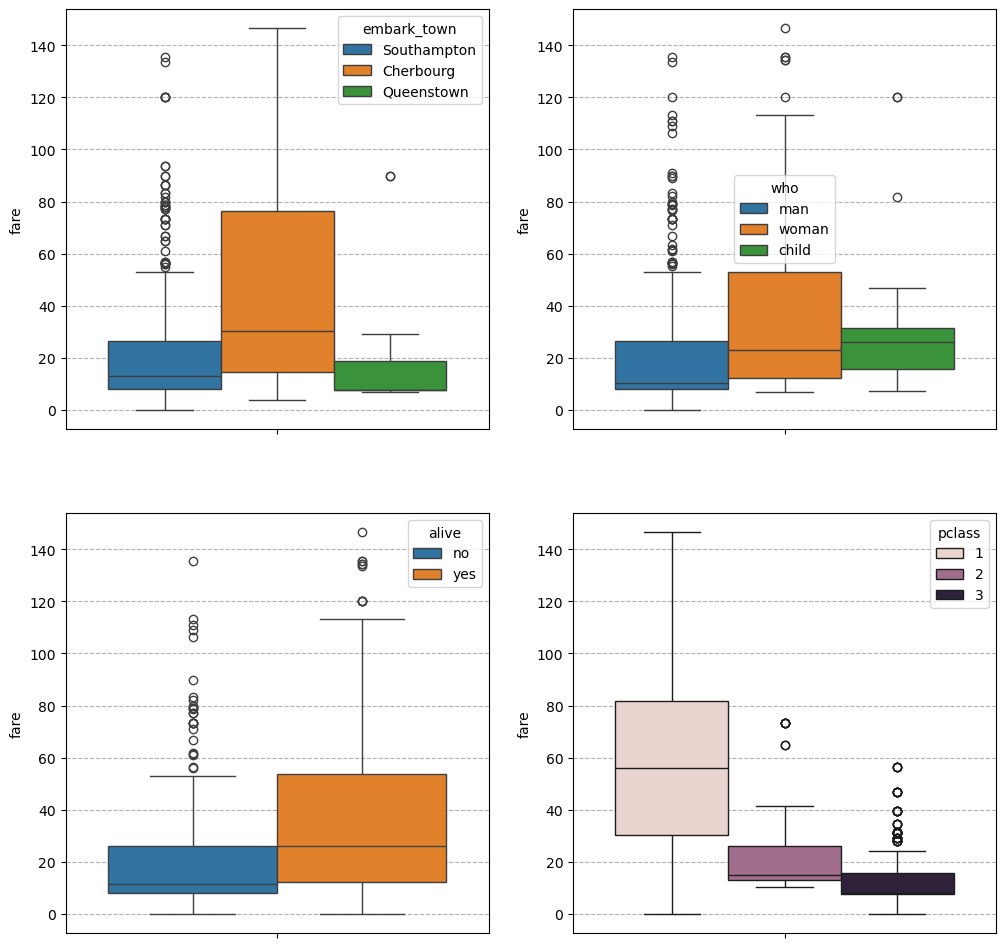

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.boxplot(data=df_lim, y='fare', hue='embark_town', ax=ax[0,0])
sns.boxplot(data=df_lim, y='fare', hue='who', ax=ax[0,1])
sns.boxplot(data=df_lim, y='fare', hue='alive', ax=ax[1,0])
sns.boxplot(data=df_lim, y='fare', hue='pclass', ax=ax[1,1])

for (i,j) in [(0,0), (0,1),(1,0), (1,1)]:
    ax[i,j].grid(axis='y', ls='--')

plt.show()

#### Solo primera clase

In [13]:
primeraclase = df_lim['fare'][df['pclass']==1]
primeraclase

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: fare, Length: 157, dtype: float64

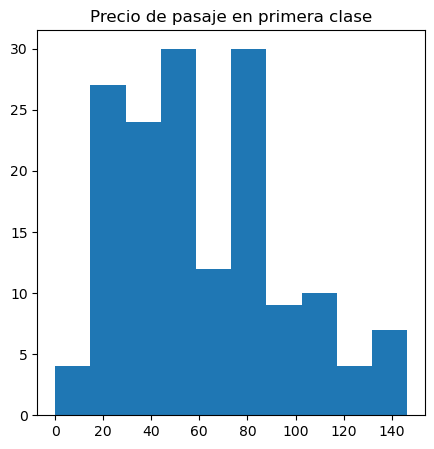

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(primeraclase, bins=10)
plt.title("Precio de pasaje en primera clase")
plt.show()

In [15]:
media = primeraclase.mean()
mediana = primeraclase.median()
skewness = st.skew(primeraclase)
curtosis = st.kurtosis(primeraclase)

print(f"Media: {media:.02f}")
print(f"Mediana: {mediana:.02f}")
print(f"Skewness: {skewness:.02f}")
print(f"Curtosis: {curtosis:.02f}")

Media: 61.58
Mediana: 55.90
Skewness: 0.51
Curtosis: -0.40


### Colores

In [19]:
# paleta de colores por defecto en Seaborn
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

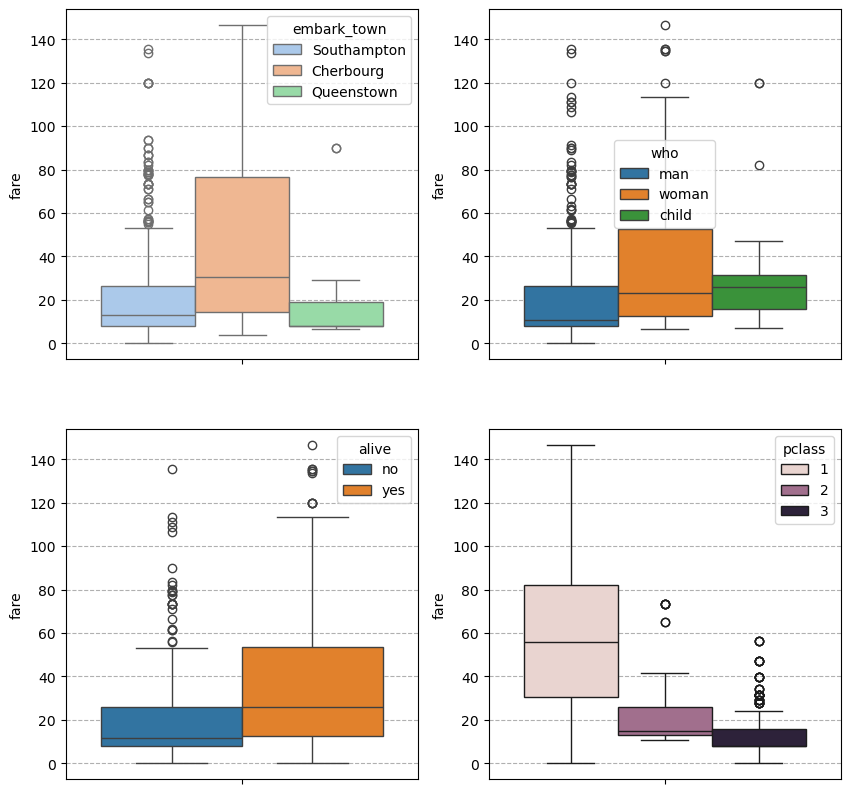

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=df_lim, y='fare', hue='embark_town', ax=ax[0,0], palette='pastel')
sns.boxplot(data=df_lim, y='fare', hue='who', ax=ax[0,1])
sns.boxplot(data=df_lim, y='fare', hue='alive', ax=ax[1,0])
sns.boxplot(data=df_lim, y='fare', hue='pclass', ax=ax[1,1])

for (i,j) in [(0,0), (0,1),(1,0), (1,1)]:
    ax[i,j].grid(axis='y', ls='--')

plt.show()

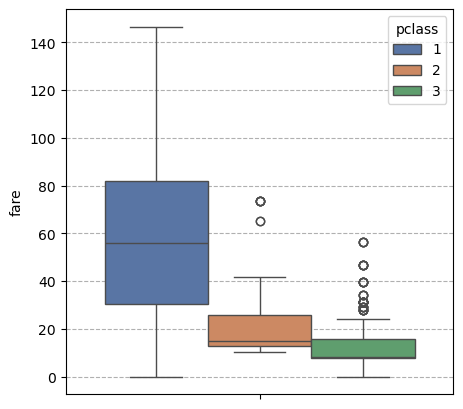

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df_lim, y='fare', hue='pclass', ax=ax, palette='deep')
ax.grid(axis='y', ls='--')
plt.show()

In [23]:
# paleta personalizada
colores_alive = {
    'no': 'darkgray',
    'yes': 'green'
    }
sns.color_palette(colores_alive.values())

[(0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.0, 0.5019607843137255, 0.0)]

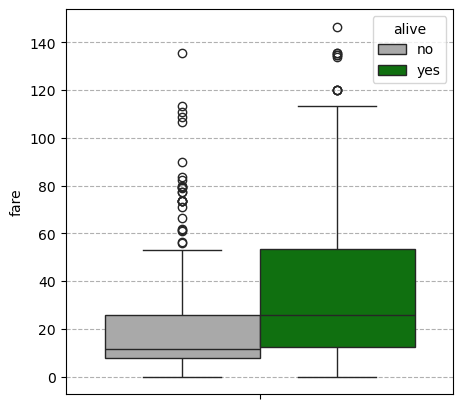

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(data=df_lim, y='fare', hue='alive', ax=ax, palette=colores_alive)
ax.grid(axis='y', ls='--')
plt.show()